# TODO buscar lá o titulo lindo e seu lindo nome tmb

## 0 - Setup

Import das bibliotecas que serão utilizadas e leiturados data_frames utilizados na construção desse notebook.


In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

headers=[
    "u_auto", "u_auto_err", "u_det", "u_det_err",
    "g_auto", "g_auto_err", "g_det", "g_det_err", 
    "r_auto", "r_auto_err", "r_det", "r_det_err", 
    "i_auto", "i_auto_err", "i_det", "i_det_err", 
    "z_auto", "z_auto_err", "z_det", "z_det_err", 
    "Y_auto", "Y_auto_err", "Y_det", "Y_det_err", 
    "z", "ra", "dec", "z_flags", "field_id", "number"
]

#todo separar isso
main_valid_df = pd.read_csv("Amostras/des_sv_main_standard.valid", delimiter=" ", names=headers)
main_train_df = pd.read_csv("Amostras/des_sv_main_standard.train", delimiter=" ", names=headers)

full_main_sample_df = pd.concat([main_train_df, main_valid_df])

deep_valid_df = pd.read_csv("Amostras/des_sv_deep_standard.valid", delimiter=" ", names=headers)
deep_train_df = pd.read_csv("Amostras/des_sv_deep_standard.train", delimiter=" ", names=headers)

full_deep_sample_df = pd.concat([deep_valid_df, deep_train_df])

full_sample_df = pd.concat([full_main_sample_df, full_deep_sample_df])

plt.style.use('seaborn-dark-palette')

## 1 - Introdução

A astronomia observacional é uma área bastante ampla, abrangendo grandes áreas como o estudo do sistema solar, astrofísica estelar, estrutura de galáxias, astrofísica extragaláctica, cosmologia, entre outros. A cosmologia é a área responsável por estudar a origem, evolução, composição e estrutura do universo. Dentro da cosmologia existe o estudo que visa entender a evolução das galáxias e as suas distâncias em relação a Terra, esse estudo utiliza das técnicas de fotometria e espectroscopia de galáxias

A espectroscopia é uma técnica que utiliza da emissão e absorção de objetos para extrair gráficos com fluxo energético por comprimento de onda, esses resultado é chamado de Spectral Energy Distribution (SED). E a fotometria utiliza de fotos para calcular o quão brilhante um objeto parece no céu, para isso os telescópios batem inúmeras fotos em diferentes comprimentos de onda para gerar catálogos de dados que depois são disponibilizados para estudos. 
Tudo no universo está em movimento, e de maneira geral, em relação a terra, os objetos podem estar se aproximando (blueshift), aparentemente parado (unshift) ou se afastando (redshift). Esse fenômeno foi primeiramente observado por volta de 1929 por Edwin Hubble utilizando a espectroscopia de galáxias, foi observado que a maioria dessas galáxias possuiam um desvio para o vermelho (redshift), esse estudo originou, mais tarde, a lei de Hubble. Atualmente, o universo pode ser estudado de maneira singular, onde se escolhem objetos para os telescópios observarem e extraírem dados mais específicos, ou em conjunto, onde se varre o céu para extrair a maior quantidade de informações de maneira mais geral sobre um grupo de objetos. 

Dentro do estudo de redshift de galáxias a área de tecnologia da informação está extremamente envolvida em todas as etapas do processo, desde a captura dos dados, na construção das imagens que vemos do universo e nas análises científicas, entre outros. No cálculo de redshift de galáxias em quantidade massiva, existem duas técnicas principais para processar esses dados: template fitting e machine learning. Para machine learning temos algoritmos que envolvem treinar uma inteligência artificial (IA) para aprender a calcular redshifts fotométricos, esse processo envolve a necessidade de uma amostra com resultados espectroscópicos já conhecidos para alimentar a IA. E, para o template fitting é utilizado algoritmos que fazem comparação com dados espectrográficos (templates) existentes de galáxias para determinar resultados dos dados fotométricos de entrada

Com isso tudo o principal objetivo é compreender os principais conceitos dentro da astronomia voltada para o estudo de redshifts fotométricos reproduzindo os resultados de um dos algoritmos analisados no artigo: Photometric redshift analysis in the Dark Energy Survey Science Verification data escrito por Sanchez et al em 2014.

O Artigo aborda de uma maneira comparativa performática, como diferentes algoritmos desempenham utilizando dados coletados pela DECam, câmera utilizada pelo levantamento de energia escura, Dark Energy Survey (DES), no período de observação. O período de observação é uma fase de testes, onde acontecem testes de capturas de imagens do céu para análises e correções no telescópio. No total foram testados treze algoritmos, dentre eles cinco utilizando template based e nove machine learning. Também foram analisados dois conjuntos de dados, um principal (main) e outro de campo profundo (deep) que são dados de galáxias com menor magnitude aparente, menor brilho

Para cada algoritmo foram realizadas quatro etapas de teste, escolhendo entre as amostras deep e a main para treino e validação comparando como os algoritmos se comportam em diferentes cenários. Esse estudo é relevante pois cada algoritmo possui um desempenho diferente de acordo com a natureza dos dados coletados, e saber qual algoritmo performa melhor em cada caso proporciona uma extração mais limpa (limpa?) de resultados. 


## 2 - Dados

Os dados utilizados no estudo são dados capturados pela DECam, câmera utilizada no DES (Dark Energy Survey), de quatro regiões capturadas no céu, COSMOS, VVDS F14, SN-X3 e SN-C3, fig. 1. Esses dados capturados nessas quatro regiões, contem galáxias já previamente estudadas em outras pesquisas, com outros telescópios, e portanto, por possuírem resultados previamente calculados, possibilitam a validação de resultados de algoritmos com as imagens da DECam. 

  > DECam. Cada "tijolo" é um sensor da câmera responsável por capturar as imagens.
  >
><img src="https://www.darkenergysurvey.org/wp-content/uploads/2016/02/DECam_fornax.jpg" width="200" height="300">

A pesquisa consta com 2 conjuntos de amostras, uma principal e outra mais profunda de campo, respectivamente _main_ e _deep_. Sendo a deep com maior tempo de exposição nos campos (COSMOS, SN-X3 e SN-C3) do que a main nos campos (VVDS F14, SN-X3 e SN-C3). A main e a deep possuem a divisão das galáxias em duas amostras, uma para treinamento de algoritmos e outra para validação dos resultados. 

Para a reprodução dos resultados foi utilizado apenas a amostra principal, _main_, porém para comparação com o artigo a amostra _deep_ foi utilizada na montagem dos gráficos de análise das amostras.

A amostra _main_ de treinamento consta com 5859 galáxias, enquanto a de validação possui 6381 galáxias. Nelas são fornecidas o resultado da captura da quantidade de luz, magnitude, em cinco faixas de comprimento de onda, nas bandas grizY, com adicional da banda u, capturada pela DECam mas não para o DES, e seus respectivos erros de cálculo. Importante pontuar que existem duas magnitudes calculadas na amostra. A MAGDETMODEL e MAGAUTO, a diferença das duas está no cálculo. A MAGDETMODEL é calculada a partir do formato da galáxia que melhor se encaixa em um filtro chamado SEXtractor e então depois é medido o fluxo de luz em cada banda de acordo com o tipo da galáxia. A MAGAUTO é calculada a partir do fluxo da abertura elíptica dando a estimativa total da magnitude do objeto. A amostra também vem com o valor da Ascendência Reta (RA) e Declinação (DEC) utilizadas para indicar a posição no céu da galáxia, assim como seus identificadores únicos e o um campo com o resultado do redshift espectroscópico já previamente calculado, utilizado para a validação dos resultados calculados com o redshift fotométrico.


In [513]:
def localizacao(x_min, x_max, y_min, y_max): 
    plt.plot(full_sample_df.ra, full_sample_df.dec, f".", color="midnightblue", alpha=0.2)
    plt.xlabel("RA", fontsize=18)
    plt.ylabel("DEC", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

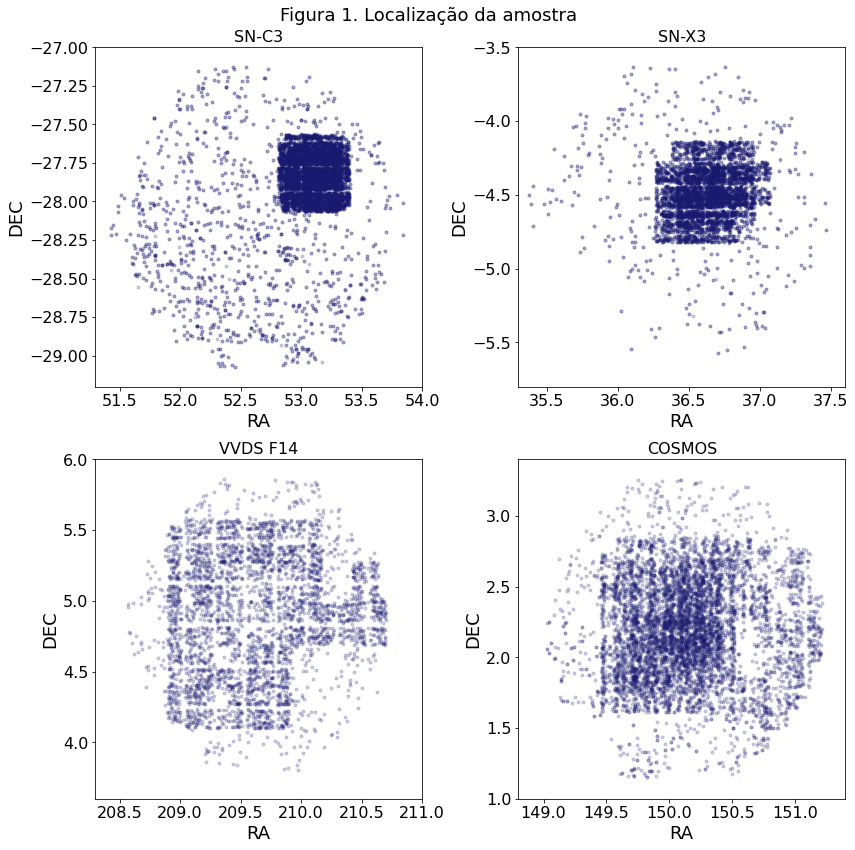

In [514]:
plt.figure(figsize=[12,12])
plt.suptitle("Figura 1. Localização da amostra", fontsize=18)

ax1 = plt.subplot(2,2,1)
ax1.set_title('SN-C3',fontsize=16)
localizacao(51.3, 54, -29.2, -27)

ax2 = plt.subplot(2,2,2)
ax2.set_title('SN-X3',fontsize=16)
localizacao(35.3, 37.6, -5.8, -3.5)

ax3 = plt.subplot(2,2,3)
ax3.set_title('VVDS F14',fontsize=16)
localizacao(208.3, 211, 3.6, 6)

ax4 = plt.subplot(2,2,4)
ax4.set_title('COSMOS',fontsize=16)
localizacao(148.8, 151.4, 1, 3.4)

plt.xticks(fontsize=16)
plt.tight_layout()

>**Figura 1.** Para cada _field_, é formado um aglomerado em cada hexágono por conta dos dados serem a junção de amostras mapeadas de maneira distinta e, portanto, possui a distribuição espacial heterogênea. Conforme mais pesquisas varrem os campos maior a quantidade de dados são capturadas e portanto acabam aparecendo mais objetos no local. Portanto, não são ruídos os pontos que estão fora dos aglomerados de pontos e sim apenas galáxias mapeadas diferentes.

In [461]:
def mag_sr(key):
    plt.plot(full_deep_sample_df[f"{key}_auto"], 1/full_deep_sample_df[f"{key}_auto_err"], f".", label="deep", color="k", alpha=0.2)
    plt.plot(full_main_sample_df[f"{key}_auto"], 1/full_main_sample_df[f"{key}_auto_err"], f".", label="main", color="dodgerblue", alpha=0.2)
    
    plt.xlabel(f"{key} magnitude", fontsize=16)
    plt.ylabel("S/N", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.xlim(21, 25)
    plt.ylim(0, 60)
    
    plt.legend(prop={'size': 14})

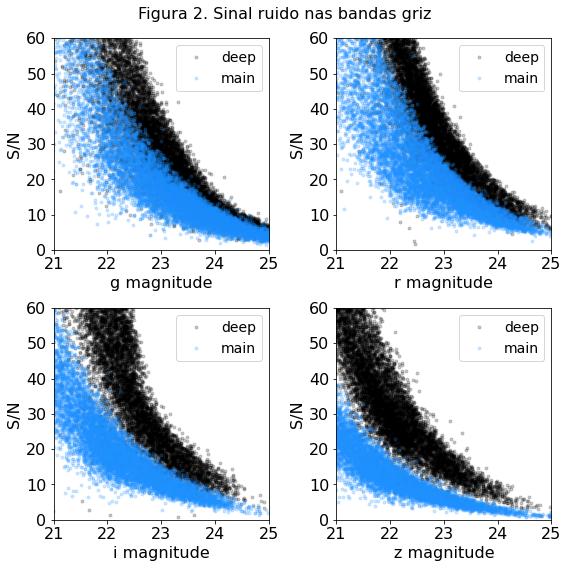

In [510]:
plt.figure(figsize=[8,8])
plt.suptitle("Figura 2. Sinal ruido nas bandas griz", fontsize=16)

bandas = list(banda_cor)

plt.subplot(2,2,1)
mag_sr("g")

plt.subplot(2,2,2)
mag_sr("r")

plt.subplot(2,2,3)
mag_sr("i")

plt.subplot(2,2,4)
mag_sr("z")

plt.tight_layout()


>**Figura 2.** Reprodução da figura 2 do artigo. A relação do sinal ruido pela magnitude, indica que, dado um ponto capturado, qual a chance de ele realmente ser um objeto no céu e não somente um erro de captura, visto que erros tendem a se anular conforme o erro varia. Aqui temos um para cada banda uma comparação sinal/ruido pela magnitude.

# Heloisa - parou aqui
># Processo de pesagem da amostra
># Como impacta?
># pra que serve?

>reprodução da fig 3

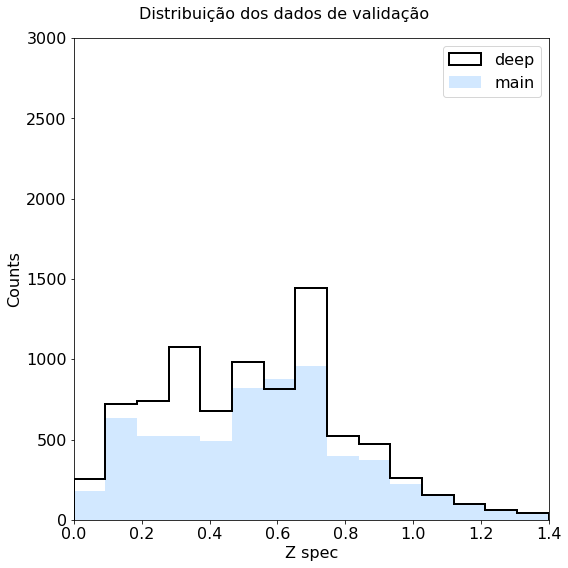

In [464]:
plt.figure(figsize=[8,8])
plt.suptitle("Distribuição dos dados de validação", fontsize=16)

plt.hist(deep_valid_df["z"], bins=np.arange(0,1.4,0.0933), histtype="step", lw=2, label="deep", color="k")
plt.hist(main_valid_df["z"], bins=np.arange(0,1.4,0.0933), alpha=0.2, label="main", color="dodgerblue")

plt.xlabel("Z spec", fontsize=16)
plt.ylabel("Counts", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0, 1.4)
plt.ylim(0, 3000)
    
plt.legend(prop={'size': 16})
plt.tight_layout()

>#### Reprodução figura 3 e 4 do artigo 

>#### Reprodução figura 4 do artigo
>1. Leitura dos weights
>2. histograma comparativo

In [456]:
weight = np.loadtxt("Amostras/des_sv_main_standard_weights", delimiter=" ", usecols=[2])

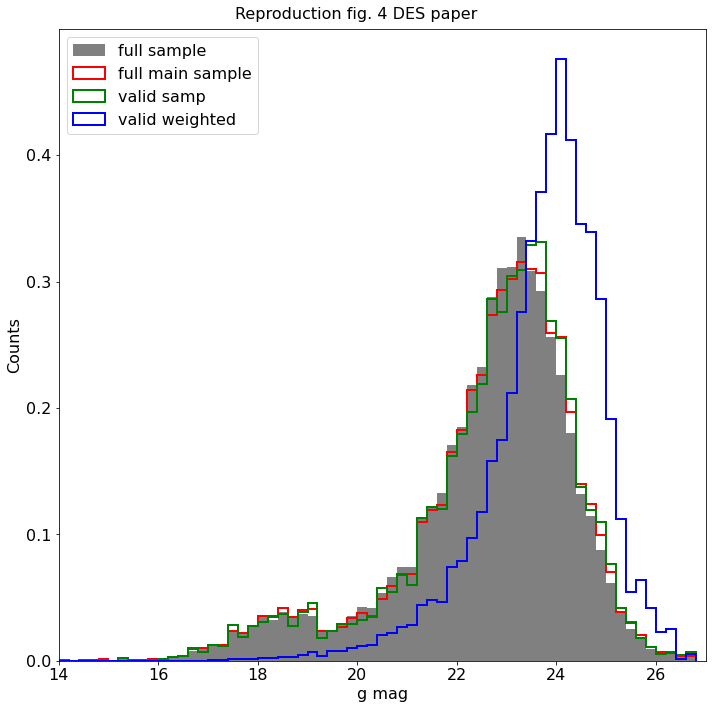

In [457]:
plt.figure(figsize=[10,10])
plt.suptitle("Reproduction fig. 4 DES paper", fontsize=16)

bins = np.arange(14,27,0.2)

plt.hist(full_sample_df["g_auto"], bins=bins, label="full sample", color="grey", lw=2, density=True)
#plt.hist(full_deep_sample_df["g_auto"], bins=bins, label="full deep sample", histtype="step", color="k", lw=2)
plt.hist(full_main_sample_df["g_auto"], bins=bins, label="full main sample", histtype="step", color="r", lw=2, density=True)
plt.hist(main_valid_df["g_auto"], bins=bins, label="valid samp", histtype="step", color="g", lw=2, density=True)
plt.hist(main_valid_df["g_auto"], bins=bins, label="valid weighted", histtype="step", color="b", lw=2, density=True, weights=weight)

plt.xlabel("g mag", fontsize=16)
plt.ylabel("Counts", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(14, 27)

plt.legend(loc=2, prop={'size': 16})
plt.tight_layout()

## 3 - Metodologia

Descrever BPZ e métricas

## 4 - Resultados

Mostrar plots e métricas, comparação com os resultados do artigo


Também podemos olhar que a nossa maior quantidade de itens com erro ficam muito próximo de zero e conforme aumenta-se a magnitude, ou seja, quanto menor o brilho aparente que o objeto tiver, o erro na sua captura vai aumentando também.


Primeiro, olhando o conteúdo separado, pode-se notar que dentro da nossa amostra total, para cada banda, existem alguns pontos com valores de erro e magnitude mais altos que a maioria dos pontos.

Podemos ver, com base nos gráficos, que, as bandas com maior erro na captura da magnitude são as bandas mais extremas u e y. Também pode-se observar que para todas as bandas existem magnitudes que extrapolam, ou estão muito próximas ao valor de 100. Olhando com mais cautela, vemos que não necessáriamente são os mesmos pontos. O que pode configurar objetos com características diferentes, por exemplo, comparando evolução em questão de idade do objeto e emissão de comprimento de onda maior em certa banda.
Isso se deve ao fato de as bandas mais externas serem mais dificeis de capturar e, portanto, possuiem um maior erro.

Com um gráfico de quantidade por erro sendo o erros mais altos percebemos que a banda u possui mais dados que as demais com problemas na captura, visto que é a banda que é de menor capacidade de transmissão.  

> Isso se deve ao fato de as bandas mais externas serem mais dificeis de capturar e, portanto, possuiem um maior erro.
<img src="Bandas.png">

## 5 - Conclusões

Lições aprendidas.